# Addition of new_deaths/confirmed and smoothed (7 days) data

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 0. Recovered Data

In [2]:
# Reading file as dictionary
df = pd.read_excel('SouthKorea_JHU_Recovered.xlsx')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,2021-01-08 00:00:00,2021-02-08 00:00:00,2021-03-08 00:00:00,2021-04-08 00:00:00
0,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,167365,170494,171559,172757,174177,175674,176605,177909,179123,180719


In [3]:
# Obtaining the deaths values since the beginning
X_original = df.values[:,4:565]
X_original

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 7,
        7, 7, 9, 9, 10, 12, 12, 16, 16, 16, 18, 18, 22, 22, 22, 22, 27,
        30, 30, 30, 41, 41, 135, 135, 118, 118, 247, 288, 333, 510, 510,
        510, 1137, 1407, 1540, 1540, 1540, 1540, 2909, 2909, 3507, 3730,
        4144, 4528, 4811, 5033, 5228, 5408, 5567, 5828, 6021, 6325, 6463,
        6598, 6694, 6776, 6973, 7117, 7243, 7368, 7447, 7534, 7616, 7757,
        7829, 7937, 8042, 8114, 8213, 8277, 8501, 8635, 8717, 8764, 8854,
        8922, 9059, 9072, 9123, 9183, 9217, 9283, 9333, 9419, 9484, 9568,
        9610, 9632, 9670, 9695, 9762, 9821, 9851, 9888, 9904, 9938,
        10066, 10135, 10162, 10194, 10213, 10226, 10275, 10295, 10340,
        10363, 10398, 10405, 10422, 10446, 10467, 10499, 10506, 10531,
        10552, 10563, 10589, 10611, 10654, 10669, 10691, 10718, 10730,
        10760, 10774, 10800, 10835, 10856, 10868, 10881, 10908, 10930,
        10974, 11172, 11317, 11364, 11429, 11537, 11613, 116

In [4]:
# Transposition of the data

X_trap = np.transpose(X_original)  # Transposition of the data
X_trap.shape, X_trap[0:10], X_trap[-1]

((561, 1),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=object),
 array([180719], dtype=object))

In [5]:
# Converting data array (Total Recovered) in an unique int array

T_recovered = np.empty(len(X_trap), dtype = object)
for i in range(len(T_recovered)):
    T_recovered[i] = int(X_trap[i])
    
T_recovered.shape, T_recovered[0:20]

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3],
       dtype=object))

## 1. Death Data

In [6]:
# Reading file as dictionary
df = pd.read_excel('SouthKorea_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,KOR,Asia,South Korea,2020-01-22,1,1,0,0
1,KOR,Asia,South Korea,2020-01-23,1,0,0,0
2,KOR,Asia,South Korea,2020-01-24,2,1,0,0
3,KOR,Asia,South Korea,2020-01-25,2,0,0,0
4,KOR,Asia,South Korea,2020-01-26,3,1,0,0


In [7]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

# Adjust to Recovered Data
T_deaths_original = T_deaths_original[0:len(T_recovered)]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 6, 8, 10, 12, 13, 13, 16, 17, 28, 28,
       35, 35, 42, 44, 50, 53, 54, 60], dtype=object)

In [8]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 2, 2, 2, 1, 0, 3, 1, 11, 0, 7, 0,
        7, 2, 6, 3, 1, 6, 6, 0, 6, 3, 0, 6, 3, 7, 3, 8, 9, 0, 9, 6, 5, 8,
        5, 8, 6, 4, 3, 4, 5, 3, 6, 3, 6, 8, 4, 4, 3, 3, 3, 5, 3, 4, 1, 2,
        2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0,
        2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2,
        2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 3, 5,
        2, 1, 0, 2, 3, 2, 2, 1, 2, 5, 3, 2, 4, 5, 3, 5, 4, 0, 5, 5, 1, 5,
        2, 3, 0, 5, 2, 4, 2, 5, 1, 6, 2, 1, 4, 1, 1, 0, 3, 2, 1, 2, 2, 1,
        1, 4, 1, 2, 2, 1, 0, 3, 3, 3, 2, 2, 0, 0, 3, 1, 1, 1, 1, 2, 2, 4,
        2, 1, 1, 1, 1, 2, 5,

In [9]:
# Creation of New Deaths Smoothed (7 days average)

N_deaths_smooth = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_deaths_original)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_deaths[j]
    N_deaths_smooth[i] = (sum_N/7)

N_deaths_smooth.shape, N_deaths_smooth

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14285714285714285, 0.2857142857142857, 0.2857142857142857,
        0.8571428571428571, 1.1428571428571428, 1.4285714285714286,
        1.7142857142857142, 1.7142857142857142, 1.5714285714285714, 2.0,
        1.5714285714285714, 2.857142857142857, 2.5714285714285716,
        3.2857142857142856, 3.142857142857143, 4.142857142857143, 4.0,
        4.714285714285714, 3.5714285714285716, 3.7142857142857144,
        3.5714285714285716, 4.428571428571429, 3.4285714285714284, 4.0,
        3.5714285714285716, 3.142857142857143, 3.857142857142857,
        3.4285714285714284, 3.5714285714285716, 4.0, 4.285714285714286,
        5.142857142857143, 5.142857142857143, 5.571428571428571, 6.0,
        5.714285714285714, 6.428571428571429, 6.0, 5.857142857142857,
        6.714285714285714, 6.0, 5.571428571428571, 5.428571428571429, 5.0,
        4.7142857142

In [10]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 6, 8, 10, 12, 13, 13, 16, 17, 28, 28,
        35, 35, 42, 44, 50, 53, 54, 60, 66, 66, 72, 75, 75, 81, 84, 91, 94,
        102, 111, 111, 120, 126, 131, 139, 144, 152, 158, 162, 165, 169,
        174, 177, 183, 186, 192, 200, 204, 208, 211, 214, 217, 222, 225,
        229, 230, 232, 234, 236, 237, 238, 240, 240, 242, 243, 244, 246,
        247, 248, 250, 250, 252, 254, 255, 256, 256, 256, 256, 256, 258,
        259, 260, 260, 262, 262, 263, 263, 263, 264, 264, 266, 266, 267,
        269, 269, 269, 269, 269, 270, 271, 272, 273, 273, 273, 273, 273,
        273, 274, 276, 276, 277, 277, 277, 277, 278, 279, 280, 280, 280,
        280, 280, 281, 281, 282, 282, 282, 282, 282, 282, 282, 282, 282,
        283, 283, 284, 285, 285, 287, 288, 288, 289, 289, 289, 289, 291,
        293, 294, 295, 296, 296, 297, 297, 298, 298, 298, 299, 300, 300,
        300, 301, 301, 301, 301, 30

In [11]:
# Creation of Total Deaths Fixed Smoothed (7 days average)

T_deaths_smooth_fix = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_deaths_original)-6):
    sum_T = 0
    for j in range(i, i+7):
        sum_T = sum_T + T_deaths_fix[j]
    T_deaths_smooth_fix[i] = (sum_T/7)

T_deaths_smooth_fix.shape, T_deaths_smooth_fix

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14285714285714285, 0.42857142857142855, 0.7142857142857143,
        1.5714285714285714, 2.7142857142857144, 4.142857142857143,
        5.857142857142857, 7.571428571428571, 9.142857142857142,
        11.142857142857142, 12.714285714285714, 15.571428571428571,
        18.142857142857142, 21.428571428571427, 24.571428571428573,
        28.714285714285715, 32.714285714285715, 37.42857142857143, 41.0,
        44.714285714285715, 48.285714285714285, 52.714285714285715,
        56.142857142857146, 60.142857142857146, 63.714285714285715,
        66.85714285714286, 70.71428571428571, 74.14285714285714,
        77.71428571428571, 81.71428571428571, 86.0, 91.14285714285714,
        96.28571428571429, 101.85714285714286, 107.85714285714286,
        113.57142857142857, 120.0, 126.0, 131.85714285714286,
        138.57142857142858, 144.57142857142858, 

In [12]:
# Collecting the dates

dates = df.values[:,3]

# Adjust to Recovered Data
dates = dates[0:len(T_recovered)]
dates.shape, dates[0:15]

((561,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [13]:
# Checking if dates and data points have the same length
len(dates), len(T_deaths_original)

(561, 561)

In [14]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'KOR'
    
iso_code.shape, iso_code[0:10]

((561,),
 array(['KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR',
        'KOR'], dtype=object))

In [15]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Asia'
    
continent.shape, continent[0:10]

((561,),
 array(['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
        'Asia', 'Asia'], dtype=object))

In [16]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'South Korea'
    
region.shape, region[0:10]

((561,),
 array(['South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea', 'South Korea'], dtype=object))

In [17]:
# Array concatenation for building the final dataframe

columns = 9  # Number of columns
X_total = np.empty((len(T_deaths_smooth_fix), columns), dtype = object)

# The first 6 values are not included to match the length of N_deaths_smooth
for i in range(len(T_deaths_smooth_fix)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_deaths_original[i+6],
                  N_deaths[i+6], N_deaths_smooth[i], T_deaths_fix[i+6], T_deaths_smooth_fix[i]]
    
X_total.shape, X_total[0:10]

((555, 9),
 array([['KOR', 'Asia', 'South Korea', Timestamp('2020-01-28 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-29 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-30 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-31 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-01 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-02 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-03 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-04 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-05 00:00:00'),
         0, 0, 0.0, 0, 0.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-06 00:00:00')

In [18]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Deaths', 'New Deaths',
          'New Deaths Smooth (7 days)', 'Total Deaths Fixed (sum New Deaths)', 'Total Deaths Fixed Smooth (7 days)']

In [19]:
# Creation of the final dataframe
df_deaths = pd.DataFrame(data=X_total, columns=labels)
df_deaths

,ISO_code,Continent,Country/Region,Date,Total Deaths,New Deaths,New Deaths Smooth (7 days),Total Deaths Fixed (sum New Deaths),Total Deaths Fixed Smooth (7 days)
0,KOR,Asia,South Korea,2020-01-28,0,0,0.0,0,0.0
1,KOR,Asia,South Korea,2020-01-29,0,0,0.0,0,0.0
2,KOR,Asia,South Korea,2020-01-30,0,0,0.0,0,0.0
3,KOR,Asia,South Korea,2020-01-31,0,0,0.0,0,0.0
4,KOR,Asia,South Korea,2020-02-01,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
550,KOR,Asia,South Korea,2021-07-31,2098,3,3.571429,2098,2086.571429
551,KOR,Asia,South Korea,2021-08-01,2099,1,3.142857,2099,2089.714286
552,KOR,Asia,South Korea,2021-08-02,2104,5,3.571429,2104,2093.285714
553,KOR,Asia,South Korea,2021-08-03,2106,2,3.285714,2106,2096.571429


In [20]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Deaths_KOR.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_deaths.to_csv(filepath, index=False)

## 2. Confirmed Data

In [21]:
# Reading file as dictionary
df = pd.read_excel('SouthKorea_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,KOR,Asia,South Korea,2020-01-22,1,1,0,0
1,KOR,Asia,South Korea,2020-01-23,1,0,0,0
2,KOR,Asia,South Korea,2020-01-24,2,1,0,0
3,KOR,Asia,South Korea,2020-01-25,2,0,0,0
4,KOR,Asia,South Korea,2020-01-26,3,1,0,0


In [22]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

# Adjust length to Recovered Data
T_cases_original = T_cases_original[0:len(T_recovered)]
N_cases_original = N_cases_original[0:len(T_recovered)]

T_cases_original[0:20], N_cases_original[0:20], T_cases_original.shape, N_cases_original.shape

(array([1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25,
        27], dtype=object),
 array([1, 0, 1, 0, 1, 1, 0, 0, 0, 7, 1, 3, 0, 1, 3, 4, 1, 0, 1, 2],
       dtype=object),
 (561,),
 (561,))

In [23]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(X_trap), dtype = object)
N_confirmed[0] = 1  # First value is 1
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((561,),
 array([1, 0, 1, 0, 1, 1, 0, 0, 0, 7, 1, 3, 0, 1, 3, 4, 1, 0, 1, 2, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 73, 100, 229, 169, 231, 144, 284, 505, 571,
        813, 586, 599, 851, 435, 467, 505, 448, 273, 164, 35, 242, 114,
        110, 107, 76, 74, 84, 93, 152, 87, 147, 162, 0, 76, 100, 104, 91,
        146, 105, 78, 125, 101, 89, 86, 94, 81, 47, 47, 53, 39, 27, 30, 32,
        25, 27, 27, 22, 22, 18, 8, 13, 9, 11, 14, 10, 10, 10, 14, 9, 4, 9,
        6, 13, 8, 3, 2, 4, 12, 18, 34, 35, 27, 26, 29, 27, 19, 13, 15, 13,
        32, 12, 20, 23, 25, 16, 19, 40, 79, 58, 39, 27, 35, 38, 49, 39, 39,
        51, 57, 38, 38, 50, 45, 56, 48, 34, 36, 34, 43, 59, 49, 67, 48, 17,
        46, 51, 28, 39, 51, 62, 42, 43, 50, 54, 63, 63, 61, 46, 44, 63, 49,
        45, 35, 44, 62, 33, 39, 61, 60, 39, 34, 26, 45, 63, 59, 41, 113,
        58, 25, 28, 48, 18, 36, 31, 30, 23, 34, 33, 43, 20, 43, 36, 28, 34,
        54, 56, 103, 166, 279, 197, 246, 297, 288, 324, 332, 397, 266, 280,
        320, 441, 3

In [24]:
# Creation of New Confirmed Smoothed (7 days average)

N_confirmed_smooth = np.empty(len(X_trap)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(N_confirmed)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_confirmed[j]
    N_confirmed_smooth[i] = (sum_N/7)

N_confirmed_smooth.shape, N_confirmed_smooth

((555,),
 array([0.5714285714285714, 0.42857142857142855, 0.42857142857142855,
        1.2857142857142858, 1.4285714285714286, 1.7142857142857142,
        1.5714285714285714, 1.7142857142857142, 2.142857142857143,
        2.7142857142857144, 1.8571428571428572, 1.7142857142857142,
        1.4285714285714286, 1.7142857142857142, 1.7142857142857142,
        1.2857142857142858, 0.7142857142857143, 0.5714285714285714,
        0.5714285714285714, 0.5714285714285714, 0.42857142857142855,
        0.42857142857142855, 0.42857142857142855, 10.857142857142858,
        25.142857142857142, 57.857142857142854, 81.85714285714286,
        114.71428571428571, 135.14285714285714, 175.71428571428572,
        237.42857142857142, 304.7142857142857, 388.14285714285717,
        447.7142857142857, 500.2857142857143, 601.2857142857143,
        622.8571428571429, 617.4285714285714, 608.0, 555.8571428571429,
        511.14285714285717, 449.0, 332.42857142857144, 304.85714285714283,
        254.42857142857142, 1

In [25]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 1

sum_T = 1
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((561,),
 array([1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25,
        27, 28, 28, 28, 28, 28, 29, 30, 31, 31, 104, 204, 433, 602, 833,
        977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088, 6593,
        7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236, 8320,
        8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332, 9478,
        9583, 9661, 9786, 9887, 9976, 10062, 10156, 10237, 10284, 10331,
        10384, 10423, 10450, 10480, 10512, 10537, 10564, 10591, 10613,
        10635, 10653, 10661, 10674, 10683, 10694, 10708, 10718, 10728,
        10738, 10752, 10761, 10765, 10774, 10780, 10793, 10801, 10804,
        10806, 10810, 10822, 10840, 10874, 10909, 10936, 10962, 10991,
        11018, 11037, 11050, 11065, 11078, 11110, 11122, 11142, 11165,
        11190, 11206, 11225, 11265, 11344, 11402, 11441, 11468, 11503,
        11541, 11590, 11629, 11668, 11719, 11776, 11814, 11852, 11902,
        11947, 12003, 12051, 12085, 12121, 12155, 12

In [26]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((561,),
 array([1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25,
        27, 28, 28, 28, 28, 28, 29, 30, 31, 31, 103, 202, 431, 596, 825,
        967, 1249, 1753, 2324, 3134, 3719, 4307, 5158, 5586, 6053, 6551,
        6997, 7264, 7425, 7459, 7695, 7803, 7913, 8014, 8087, 8161, 8239,
        8329, 8474, 8558, 8697, 8850, 8850, 8917, 9011, 9110, 9193, 9334,
        9431, 9503, 9624, 9722, 9807, 9888, 9979, 10054, 10098, 10139,
        10184, 10219, 10242, 10269, 10298, 10320, 10342, 10366, 10384,
        10405, 10421, 10427, 10438, 10446, 10456, 10468, 10478, 10486,
        10495, 10508, 10515, 10518, 10526, 10530, 10543, 10549, 10550,
        10551, 10554, 10566, 10584, 10618, 10653, 10678, 10703, 10731,
        10758, 10775, 10788, 10802, 10815, 10847, 10858, 10878, 10899,
        10924, 10939, 10956, 10996, 11075, 11133, 11172, 11198, 11232,
        11269, 11317, 11356, 11395, 11446, 11503, 11541, 11578, 11626,
        11671, 11726, 11774, 11808, 11844, 11877, 1191

In [27]:
# Alive Confirmed Accumulated

Ac_confirmed_alive = np.empty(len(N_confirmed), dtype = object)

for i in range(0, len(T_confirmed_fix), 1):
    Ac_confirmed_alive[i] = T_confirmed_alive_fix[i] - T_recovered[i]

Ac_confirmed_alive.shape, Ac_confirmed_alive

((561,),
 array([1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 23, 23, 22,
        24, 25, 21, 21, 21, 19, 20, 20, 19, 19, 87, 186, 415, 578, 807,
        945, 1227, 1731, 2302, 3107, 3689, 4277, 5128, 5545, 6012, 6416,
        6862, 7146, 7307, 7212, 7407, 7470, 7403, 7504, 7577, 7024, 6832,
        6789, 6934, 7018, 7157, 5941, 5941, 5410, 5281, 4966, 4665, 4523,
        4398, 4275, 4216, 4155, 3979, 3867, 3654, 3591, 3500, 3445, 3408,
        3246, 3125, 3026, 2930, 2873, 2808, 2750, 2627, 2576, 2484, 2385,
        2324, 2233, 2179, 1967, 1843, 1769, 1731, 1654, 1593, 1459, 1454,
        1407, 1360, 1332, 1267, 1218, 1135, 1082, 1016, 1008, 1021, 1008,
        1008, 969, 937, 924, 900, 898, 877, 781, 723, 716, 705, 711, 713,
        681, 701, 735, 770, 774, 793, 810, 823, 850, 857, 889, 915, 951,
        978, 989, 1015, 1017, 1057, 1083, 1090, 1114, 1117, 1145, 1177,
        1191, 1237, 1273, 1277, 1295, 1324, 1307, 1148, 1054, 1069, 1046,
        981, 955, 938, 926, 936, 9

In [28]:
# Creation of Alive Accumulated Confirmed Smoothed (7 days average)

Ac_confirmed_alive_smooth = np.empty(len(X_trap)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(Ac_confirmed_alive)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_confirmed_alive[j]
    Ac_confirmed_alive_smooth[i] = (sum_Ac/7)

Ac_confirmed_alive_smooth.shape, Ac_confirmed_alive_smooth

((555,),
 array([2.4285714285714284, 2.857142857142857, 3.2857142857142856,
        4.571428571428571, 6.0, 7.714285714285714, 9.285714285714286, 11.0,
        13.142857142857142, 15.857142857142858, 17.571428571428573,
        19.142857142857142, 20.142857142857142, 21.428571428571427,
        22.714285714285715, 23.0, 22.714285714285715, 22.428571428571427,
        21.857142857142858, 21.571428571428573, 21.0, 20.142857142857142,
        19.857142857142858, 29.285714285714285, 52.857142857142854,
        109.42857142857143, 189.14285714285714, 301.57142857142856,
        433.85714285714283, 606.4285714285714, 841.2857142857143,
        1143.5714285714287, 1528.142857142857, 1972.5714285714287,
        2468.285714285714, 3065.8571428571427, 3682.714285714286,
        4294.285714285715, 4882.0, 5418.428571428572, 5912.285714285715,
        6345.142857142857, 6642.857142857143, 6908.857142857143,
        7117.142857142857, 7258.142857142857, 7349.857142857143,
        7411.428571428572,

In [29]:
# Collecting the dates

dates = df.values[:,3]

#Adjust to Recovered Data
dates = dates[0:len(T_recovered)]
dates.shape, dates[0:15]

((561,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [30]:
# Checking if dates and data points have the same length
len(dates), len(X_trap)

(561, 561)

In [31]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'KOR'
    
iso_code.shape, iso_code[0:10]

((561,),
 array(['KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR', 'KOR',
        'KOR'], dtype=object))

In [32]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Asia'
    
continent.shape, continent[0:10]

((561,),
 array(['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
        'Asia', 'Asia'], dtype=object))

In [33]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'South Korea'
    
region.shape, region[0:10]

((561,),
 array(['South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea', 'South Korea'], dtype=object))

In [34]:
# Array concatenation for building the final dataframe

columns = 11  # Number of columns
X_total = np.empty((len(N_confirmed_smooth), columns), dtype = object)

# The first 6 values are not included to match the length of N_confirmed_smooth
for i in range(len(N_confirmed_smooth)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_cases_original[i+6], N_confirmed[i+6],
                  N_confirmed_smooth[i], T_confirmed_fix[i+6], T_confirmed_alive_fix[i+6], 
                  Ac_confirmed_alive[i+6], Ac_confirmed_alive_smooth[i]]
    
X_total.shape, X_total[0:10]

((555, 11),
 array([['KOR', 'Asia', 'South Korea', Timestamp('2020-01-28 00:00:00'),
         4, 0, 0.5714285714285714, 4, 4, 4, 2.4285714285714284],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-29 00:00:00'),
         4, 0, 0.42857142857142855, 4, 4, 4, 2.857142857142857],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-30 00:00:00'),
         4, 0, 0.42857142857142855, 4, 4, 4, 3.2857142857142856],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-01-31 00:00:00'),
         11, 7, 1.2857142857142858, 11, 11, 11, 4.571428571428571],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-01 00:00:00'),
         12, 1, 1.4285714285714286, 12, 12, 12, 6.0],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-02 00:00:00'),
         15, 3, 1.7142857142857142, 15, 15, 15, 7.714285714285714],
        ['KOR', 'Asia', 'South Korea', Timestamp('2020-02-03 00:00:00'),
         15, 0, 1.5714285714285714, 15, 15, 15, 9.285714285714286],
        ['KOR', 'Asia',

In [35]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Confirmed', 'New Confirmed', 'New Confirmed Smooth (7 days)',
          'Total Confirmed Fixed (sum New Confirmed)', 'Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths)',
          'Accumulated Alive Confirmed in 14 days', 'Accumulated Alive Confirmed Smooth in 14 days']

In [36]:
# Creation of the final dataframe
df_confirmed = pd.DataFrame(data=X_total, columns=labels)
df_confirmed

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,KOR,Asia,South Korea,2020-01-28,4,0,0.571429,4,4,4,2.428571
1,KOR,Asia,South Korea,2020-01-29,4,0,0.428571,4,4,4,2.857143
2,KOR,Asia,South Korea,2020-01-30,4,0,0.428571,4,4,4,3.285714
3,KOR,Asia,South Korea,2020-01-31,11,7,1.285714,11,11,11,4.571429
4,KOR,Asia,South Korea,2020-02-01,12,1,1.428571,12,12,12,6.0
...,...,...,...,...,...,...,...,...,...,...,...
550,KOR,Asia,South Korea,2021-07-31,199787,1442,1562.714286,199787,197689,22015,21594.857143
551,KOR,Asia,South Korea,2021-08-01,201002,1215,1548.0,201002,198903,22298,21819.714286
552,KOR,Asia,South Korea,2021-08-02,202203,1201,1524.571429,202203,200099,22190,21834.428571
553,KOR,Asia,South Korea,2021-08-03,203926,1723,1499.857143,203926,201820,22697,22098.285714


In [37]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Confirmed_KOR_OF.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_confirmed.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Infected Official')

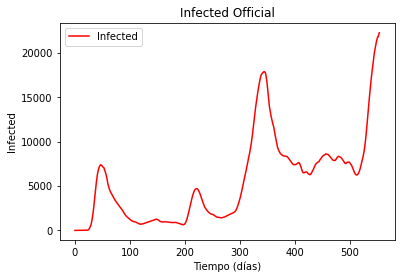

In [38]:
plt.plot(range(0, len(Ac_confirmed_alive_smooth)), Ac_confirmed_alive_smooth, 'r', label="Infected")
plt.xlabel("Tiempo (días)")
plt.ylabel("Infected")
plt.legend()

plt.title("Infected Official")

Text(0.5, 1.0, 'Deaths')

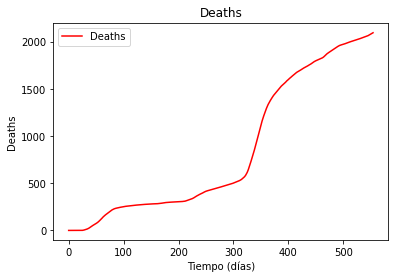

In [39]:
plt.plot(range(0, len(T_deaths_smooth_fix)), T_deaths_smooth_fix, 'r', label="Deaths")
plt.xlabel("Tiempo (días)")
plt.ylabel("Deaths")
plt.legend()

plt.title("Deaths")

In [40]:
T_deaths_smooth_fix[-1]

2100.0

In [41]:
T_confirmed_fix[-1]

205702